# Ajustes linear da dados experimentais de Arrhenius

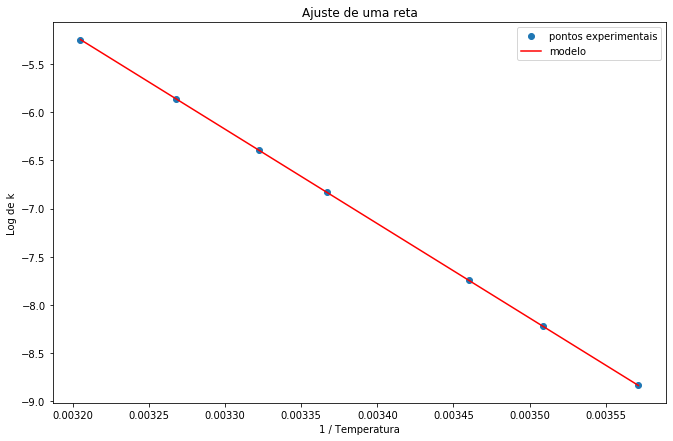

__________________________________________________
Ajuste Linear
   Temperatura  velocidade_mod  velocidade_exp
0        280.0        0.000145        0.000145
1        285.0        0.000268        0.000268
2        289.0        0.000432        0.000432
3        297.0        0.001078        0.001078
4        301.0        0.001672        0.001672
5        306.0        0.002849        0.002849
6        312.0        0.005279        0.005280
A energia de ativação é:  81597.28 Joules/mol
O fator de frequencia é: 2.4209e+11 L/mol.s
O Coeficiente de ajuste é:   1.0
__________________________________________________


In [21]:
# Ajustes linear da dados experimentais de Arrhenius

# importando os pacotes do python
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

# Lendo o arquivo csv na pasta
dados = pd.read_csv('dados_livro_arrhenius.csv')

#transformando data frame em vetor
dados_np = dados.values

#vetor do eixo x
x = 1/dados_np[:,0]
#vetor do eixo y
y = np.log(dados_np[:,1])

#Ajustando a correlação linear
linear_p = np.polyfit(x, y, 1)

Ea = linear_p[0] *(-8.314) # Estimativa da energia de ativação em J /mol
A = np.exp(linear_p[1]) # Fator de frequencia

#impressão dos dados experimentais e do modelo linear
plt.plot(x, y, "o", label = "pontos experimentais")
plt.plot(x, np.polyval(linear_p, x), "-r", label = "modelo")
plt.xlabel("1 / Temperatura")
plt.ylabel("Log de k")
plt.rcParams['figure.figsize'] = (11,7)
plt.title("Ajuste de uma reta")
plt.legend()
plt.show()

yfit = linear_p[0] * x + linear_p[1] # calcula os valores preditos
yresid = y - yfit # resíduo = valor real - valor ajustado (valor predito)
SQresid = sum(pow(yresid,2)) # soma dos quadrados dos resíduos 
SQtotal = len(y) * np.var(y) # número de elementos do vetor y vezes a variância de y
r2 = 1 - SQresid/SQtotal # coeficiente de determinação

print(50*"_")
print('Ajuste Linear')
#dados do modelo ajustado
dados_v = np.transpose(np.exp(yfit))
dados_df = pd.DataFrame({"Temperatura":dados_np[:,0], "velocidade_mod":dados_v, "velocidade_exp":dados_np[:,1]})
print(dados_df)

print(f'A energia de ativação é: {Ea:9.7} Joules/mol')
print(f'O fator de frequencia é: {A:9.5} L/mol.s')
print(f'O Coeficiente de ajuste é: {r2:5.5}')
print(50*"_")

# Ajustes exponencial da dados experimentais de Arrhenius

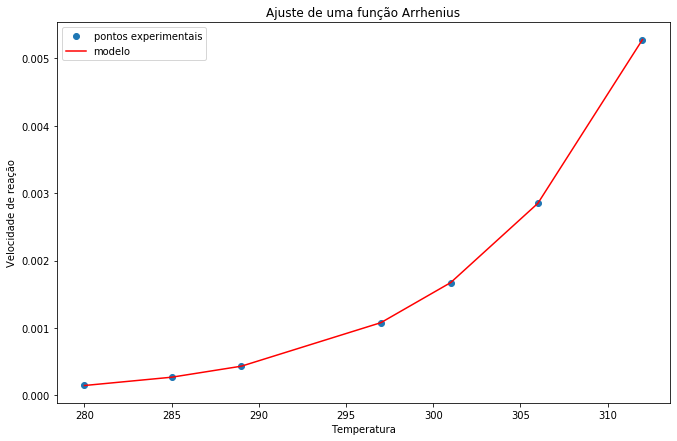

Ajuste não-linear
   Temperatura  velocidade_mod  velocidade_exp
0        280.0        0.000145        0.000145
1        285.0        0.000268        0.000268
2        289.0        0.000432        0.000432
3        297.0        0.001078        0.001078
4        301.0        0.001672        0.001672
5        306.0        0.002849        0.002849
6        312.0        0.005280        0.005280
A energia de ativação é:  81610.68 Joules/mol
O fator de frequencia é: 2.4338e+11 L/mol.s
O Coeficiente de ajuste é:   1.0
__________________________________________________


In [22]:
# Ajustes não linear da dados experimentais de Arrhenius

#vetor do eixo x
T = dados_np[:, 0]

#vetor do eixo y
k = dados_np[:, 1]

# Definição do modelo
def Arr(T, A, E):
  R = 8.314  # constante dos gases em Joule/ (mol * K)
  return A * np.exp(-(E/(R*T)))

# Chamada de curve_fit
popt, pcov = curve_fit(Arr, T, k, p0=(10000, 10), maxfev=2000)
p1, p2 = popt

y_ajustado = Arr(T, p1, p2)
#impressão dos dados experimentais e do modelo
plt.plot(T, k, "o", label="pontos experimentais")
plt.plot(T, y_ajustado, "-r", label="modelo")
plt.xlabel("Temperatura")
plt.ylabel("Velocidade de reação")
plt.rcParams['figure.figsize'] = (11, 7)
plt.title("Ajuste de uma função Arrhenius")
plt.legend()
plt.show()

r2 = 1. - sum((Arr(T, p1, p2) - k) ** 2) / sum((k - np.mean(k)) ** 2)

print('Ajuste não-linear')
#dados do modelo ajustado
dados_df = pd.DataFrame(
    {"Temperatura": T, "velocidade_mod": y_ajustado, "velocidade_exp": k})
print(dados_df)

print(f'A energia de ativação é: {p2:9.7} Joules/mol')
print(f'O fator de frequencia é: {p1:9.5} L/mol.s')
print(f'O Coeficiente de ajuste é: {r2:5.4}')
print(50*"_")


# Integração do balanço da reação

## Reação a 297 K

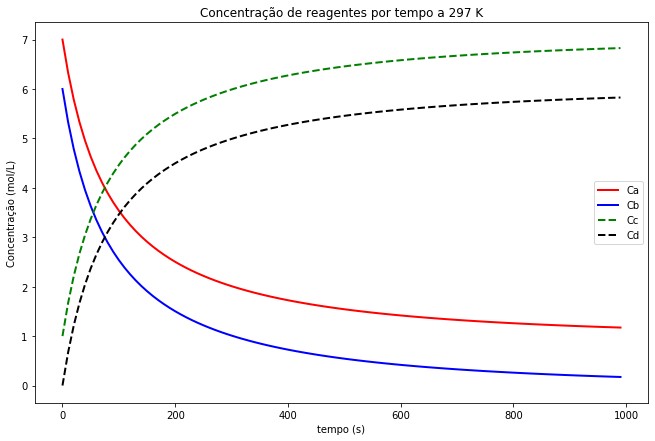

    tempo(s)        Ca        Cb        Cc        Cd
0          0  7.000000  6.000000  1.000000  0.000000
1         10  6.329943  5.329943  1.670057  0.670057
2         20  5.785876  4.785876  2.214124  1.214124
3         30  5.335384  4.335384  2.664616  1.664616
4         40  4.956292  3.956292  3.043708  2.043708
..       ...       ...       ...       ...       ...
95       950  1.187651  0.187651  6.812349  5.812349
96       960  1.183732  0.183732  6.816268  5.816268
97       970  1.179907  0.179907  6.820093  5.820093
98       980  1.176174  0.176174  6.823826  5.823826
99       990  1.172529  0.172529  6.827471  5.827471

[100 rows x 5 columns]


In [23]:
# Integrando reação A + B - C + D
from scipy.integrate import odeint

# reação química de segunda ordem, reagentes A e B, produtos C e D
def reacao (C, t, k):
    Ca , Cb, Cc, Cd = C
    dCadt = -k*Ca*Cb
    dCbdt = -k*Ca*Cb
    dCcdt = k*Ca*Cb
    dCddt = k*Ca*Cb
    return [dCadt,dCbdt, dCcdt, dCddt]

# tempo e concentração inicial
t = np.arange (0,1000,10)
C0 = [7,6,1,0]

# Temperatura de 297 k tem k de 0.00178
k = 0.00178
#integração numérica
C297 = odeint(reacao, C0, t, args=(k,))

#Construindo o gráficos dos 2 reagentes e 2 produtos a 297 K
plt.plot(t, C297[:,0], 'r-',linewidth=2, label="Ca")
plt.plot(t, C297[:,1],'b-',linewidth=2, label="Cb")
plt.plot(t, C297[:,2], 'g--',linewidth=2, label="Cc")
plt.plot(t, C297[:,3], 'k--',linewidth=2, label="Cd")
plt.xlabel("tempo (s)")
plt.ylabel("Concentração (mol/L)")
plt.rcParams['figure.figsize'] = (11, 7)
plt.title("Concentração de reagentes por tempo a 297 K")
plt.legend()
plt.show()

# Organizando os dados 
dados_reacao = pd.DataFrame({"tempo(s)": t,"Ca": C297[:,0], "Cb":C297[:,1], "Cc":C297[:,2], "Cd":C297[:,3]})
print(dados_reacao)
dados_reacao.to_csv("dados_reacao.csv")

## Reação a 306 K

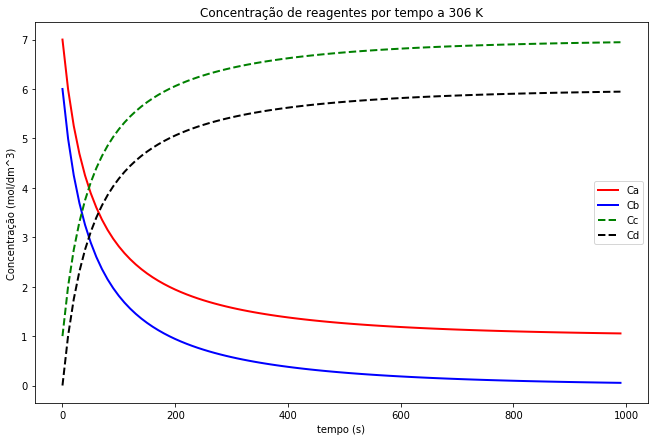

    tempo(s)        Ca        Cb        Cc        Cd
0          0  7.000000  6.000000  1.000000  0.000000
1         10  5.990443  4.990443  2.009557  1.009557
2         20  5.253984  4.253984  2.746016  1.746016
3         30  4.693212  3.693212  3.306788  2.306788
4         40  4.252119  3.252119  3.747881  2.747881
..       ...       ...       ...       ...       ...
95       950  1.060703  0.060703  6.939297  5.939297
96       960  1.058897  0.058897  6.941103  5.941103
97       970  1.057148  0.057148  6.942852  5.942852
98       980  1.055454  0.055454  6.944546  5.944546
99       990  1.053813  0.053813  6.946187  5.946187

[100 rows x 5 columns]


In [24]:
# Integrando reação A + B - C + D
from scipy.integrate import odeint

# reação química de segunda ordem, reagentes A e B, produtos C e D
def reacao (C, t, k):
    Ca , Cb, Cc, Cd = C
    dCadt = -k*Ca*Cb
    dCbdt = -k*Ca*Cb
    dCcdt = k*Ca*Cb
    dCddt = k*Ca*Cb
    return [dCadt,dCbdt, dCcdt, dCddt]

# tempo e concentração inicial
t = np.arange (0,1000,10)
C0 = [7,6,1,0]

# Temperatura de 306 K tem k de 0.002849
k = 0.002849
#integração numérica
C306 = odeint(reacao, C0, t, args=(k,))

#Construindo o gráficos dos 2 reagentes e 2 produtos a 306 K
plt.plot(t, C306[:,0], 'r-',linewidth=2, label="Ca")
plt.plot(t, C306[:,1],'b-',linewidth=2, label="Cb")
plt.plot(t, C306[:,2], 'g--',linewidth=2, label="Cc")
plt.plot(t, C306[:,3], 'k--',linewidth=2, label="Cd")
plt.xlabel("tempo (s)")
plt.ylabel("Concentração (mol/dm^3)")
plt.rcParams['figure.figsize'] = (11, 7)
plt.title("Concentração de reagentes por tempo a 306 K")
plt.legend()
plt.show()

# Organizando os dados 
dados_reacao = pd.DataFrame({"tempo(s)": t,"Ca": C306[:,0], "Cb":C306[:,1], "Cc":C306[:,2], "Cd":C306[:,3]})
print(dados_reacao)
dados_reacao.to_csv("dados_reacao.csv")

## Diferentes valores de K

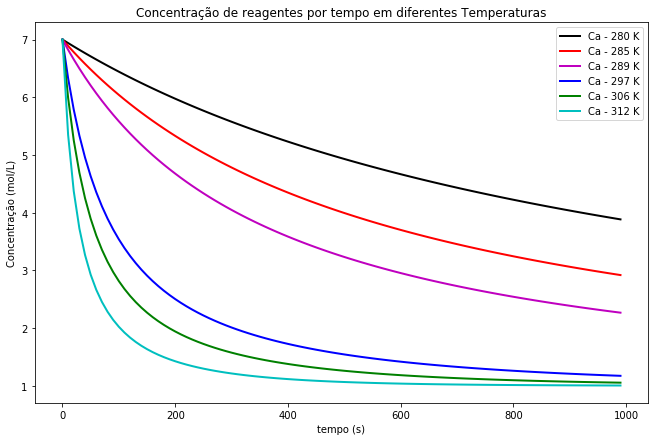

In [25]:
# Integrando reação A + B - C + D
from scipy.integrate import odeint

# reação química de segunda ordem, reagentes A e B, produtos C e D
def reacao (C, t, k):
    Ca , Cb, Cc, Cd = C
    dCadt = -k*Ca*Cb
    dCbdt = -k*Ca*Cb
    dCcdt = k*Ca*Cb
    dCddt = k*Ca*Cb
    return [dCadt,dCbdt, dCcdt, dCddt]

# tempo e concentração inicial
t = np.arange (0,1000,10)
C0 = [7,6,1,0]

# Temperatura de 280 k tem k de 0.000145
k = 0.000145
#integração numérica
C280 = odeint(reacao, C0, t, args=(k,))

# Temperatura de 285 k tem k de 0.000268
k = 0.000268
#integração numérica
C285 = odeint(reacao, C0, t, args=(k,))

# Temperatura de 289 k tem k de 0.000432
k = 0.000432
#integração numérica
C289 = odeint(reacao, C0, t, args=(k,))

# Temperatura de 297 k tem k de 0.00178
k = 0.00178
#integração numérica
C297 = odeint(reacao, C0, t, args=(k,))


# Temperatura de 306 K tem k de 0.002849
k = 0.002849
C306 = odeint(reacao, C0, t, args=(k,))


# Temperatura de 312 K tem k de 0.005279
k = 0.005279
C312 = odeint(reacao, C0, t, args=(k,))


#Construindo o gráficos
plt.plot(t, C280[:,0], 'k-',linewidth=2, label="Ca - 280 K")
plt.plot(t, C285[:,0], 'r-',linewidth=2, label="Ca - 285 K")
plt.plot(t, C289[:,0], 'm-',linewidth=2, label="Ca - 289 K")
plt.plot(t, C297[:,0],'b-',linewidth=2, label="Ca - 297 K")
plt.plot(t, C306[:,0],'g-',linewidth=2, label="Ca - 306 K")
plt.plot(t, C312[:,0],'c-',linewidth=2, label="Ca - 312 K")
plt.xlabel("tempo (s)")
plt.ylabel("Concentração (mol/L)")
plt.rcParams['figure.figsize'] = (11, 7)
plt.title("Concentração de reagentes por tempo em diferentes Temperaturas")
plt.legend()
plt.show()

## Diferentes Energias de ativação

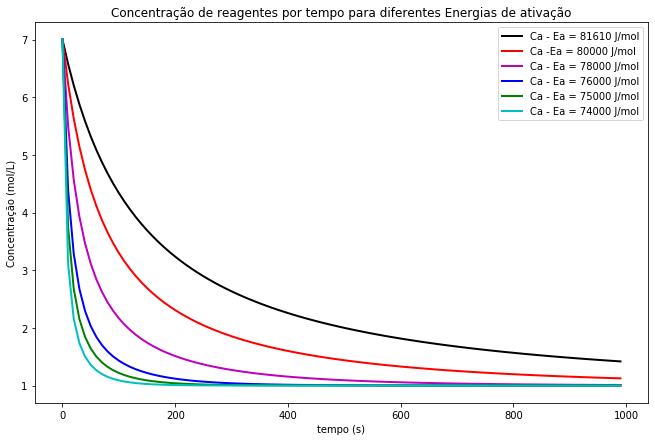

In [26]:

# Definição do modelo
def Arrhenius(Temp, A, E):
  R = 8.314  # constante dos gases em Joule/ (mol * K)
  return A * np.exp(-(E/(R*Temp)))

# Temperatura de 297 K tem Energia de ativação de 81610 J/mol
k = Arrhenius(297, 2.4338e+11, 81610)
#integração numérica
C81 = odeint(reacao, C0, t, args=(k,))

# Temperatura de 297 K tem Energia de ativação de 80000 J/mol
k = Arrhenius(297, 2.4338e+11, 80000)
#integração numérica
C80 = odeint(reacao, C0, t, args=(k,))

# Temperatura de 297 K tem Energia de ativação de 78000 J/mol
k = Arrhenius(297, 2.4338e+11, 78000)
#integração numérica
C78 = odeint(reacao, C0, t, args=(k,))

# Temperatura de 297 K tem Energia de ativação de 76000 J/mol
k = Arrhenius(297, 2.4338e+11, 76000)
#integração numérica
C76 = odeint(reacao, C0, t, args=(k,))

# Temperatura de 297 K tem Energia de ativação de 75000 J/mol
k = Arrhenius(297, 2.4338e+11, 75000)
C75 = odeint(reacao, C0, t, args=(k,))

# Temperatura de 297 K tem Energia de ativação de 74000 J/mol
k = Arrhenius(297, 2.4338e+11, 74000)
C74 = odeint(reacao, C0, t, args=(k,))

#Construindo o gráficos
plt.plot(t, C81[:,0], 'k-',linewidth=2, label="Ca - Ea = 81610 J/mol")
plt.plot(t, C80[:,0], 'r-',linewidth=2, label="Ca -Ea = 80000 J/mol")
plt.plot(t, C78[:,0], 'm-',linewidth=2, label="Ca - Ea = 78000 J/mol")
plt.plot(t, C76[:,0],'b-',linewidth=2, label="Ca - Ea = 76000 J/mol")
plt.plot(t, C75[:,0],'g-',linewidth=2, label="Ca - Ea = 75000 J/mol")
plt.plot(t, C74[:,0],'c-',linewidth=2, label="Ca - Ea = 74000 J/mol")
plt.xlabel("tempo (s)")
plt.ylabel("Concentração (mol/L)")
plt.rcParams['figure.figsize'] = (11, 7)
plt.title("Concentração de reagentes por tempo para diferentes Energias de ativação")
plt.legend()
plt.show()
